In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import load_model

In [3]:
# Load dữ liệu từ tệp mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:60000,:], y_train[:60000]

print(X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

print("shape of X_train:{}".format(X_train.shape))
print("shape of y_train:{}".format(y_train.shape))

print("shape of X_test:{}".format(X_test.shape))
print("shape of y_test:{}".format(y_test.shape))

shape of X_train:(60000, 28, 28, 1)
shape of y_train:(60000,)
shape of X_test:(10000, 28, 28, 1)
shape of y_test:(10000,)


In [5]:
# Áp dụng thuật toán One hot encoding
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)

print('Dữ liệu y ban đầu', y_train[1])
print('Dữ liệu y sau one-hot encoding',Y_train[1])

Dữ liệu y ban đầu 0
Dữ liệu y sau one-hot encoding [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
# Định nghĩa mô hình
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
#Thêm max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#flatten layer chuyển từ tensor sang vector
model.add(Flatten())

#Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='relu'))
#Output layer với 10 node và dùng softmax function để chuyển sang xác suất
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Biên dịch chương trình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#bước này không chạy
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=15, verbose=1)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 59ms/step - accuracy: 0.9239 - loss: 0.2438 - val_accuracy: 0.9883 - val_loss: 0.0359
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9873 - loss: 0.0407 - val_accuracy: 0.9934 - val_loss: 0.0214
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9923 - loss: 0.0239 - val_accuracy: 0.9963 - val_loss: 0.0123
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 111s 59ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9949 - val_loss: 0.0152
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9962 - val_loss: 0.0118
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9973 - loss: 0.0080 - val_accuracy: 0.9967 - val_loss: 0.0083
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.9976 - loss: 0.0066 - val_accuracy: 0.9991 - val_loss: 0.0026
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 

In [8]:
# save model
model.save('/content/drive/My Drive/TTNT_BTL/reco_digit.keras')


In [9]:
# Tải lại mô hình từ file
model = load_model('/content/drive/My Drive/TTNT_BTL/reco_digit.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.2949023246765137, 0.13979999721050262]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Final Output: 3


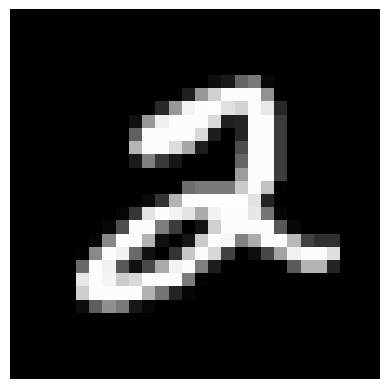

In [11]:
example = X_train[5]

prediction = model.predict(example.reshape(1, 28, 28, 1))

print("\n\nFinal Output: {}".format(np.argmax(prediction)))

plt.imshow(example.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [12]:
# Sắp xếp viền theo trục x

def x_cord_contour(contour):
  if cv2.contourArea(contour) > 10:
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))
  else:
    pass

In [13]:

# Hàm xuất dữ liệu ra file CSV
def output_file(path, array):
    # Chuyển đổi mảng thành chuỗi dạng CSV
    content = ','.join([str(x) for x in array])  # Sử dụng ',' để ngăn cách các giá trị

    # Mở file và ghi dữ liệu
    with open(path, 'a') as f:
        # Nếu file trống, ghi tiêu đề vào file
        if os.stat(path).st_size == 0:
            empty_df = pd.DataFrame(columns=['So_Hieu'])
            empty_df.to_csv(f, index=False)

        # Ghi nội dung vào file
        f.write(content + '\n')  # Ghi nội dung vào file




In [14]:
# Nhận dạng chữ số và xuất file
def reco_digits(img):
    # Gaussian blur , otsu's threshold
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Xử lý điểm ảnh nhỏ
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        area = cv2.contourArea(c)
        if area < 800:
            cv2.drawContours(thresh, [c], -1, (0, 0, 0), -1)

    # Find Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sắp xếp đường viền từ trái sang phải
    contours_left_to_right = sorted(contours, key=x_cord_contour, reverse=False)

    preprocessed_digits = []
    for (i, c) in enumerate(contours_left_to_right):
        (x, y, w, h) = cv2.boundingRect(c)

        # Tạo viền quanh chữ số trong ảnh
        cv2.rectangle(img, (x, y), (x + w, y + h), color=(0, 0, 0), thickness=2)

        # Cắt ảnh và xử lý
        digit = thresh[y:y + h, x:x + w]

        # Resize về size(18,18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding 5px black to 4 corners -> (28,28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        # Thêm vào mảng
        preprocessed_digits.append(padded_digit)

    print("\n\n\n")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Dự đoán kết quả
    processed_digits = []  # Sử dụng danh sách khác để lưu kết quả dự đoán

    for digit in preprocessed_digits:
        prediction = model.predict(digit.reshape(1, 28, 28, 1))
        # plt.subplot(5, 5, i + 1)
        # plt.title(np.argmax(prediction))
        # plt.imshow(digit.reshape(28, 28), cmap='gray')
        # plt.axis('off')
        # plt.show()
        processed_digits.append(np.argmax(prediction))  # Lưu kết quả dự đoán

    # In các chữ số cần nhận dạng
    arr = np.array(processed_digits)
    print('Kết quả nhận dạng:', arr)
    output_file('/content/drive/My Drive/TTNT_BTL/output.csv', arr)


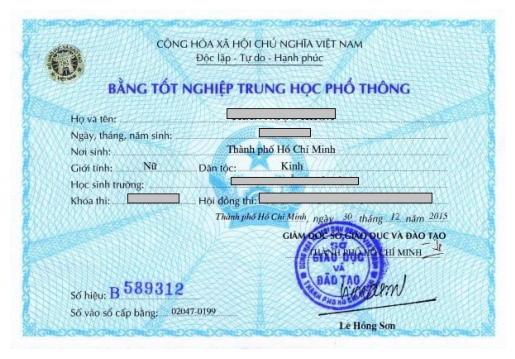

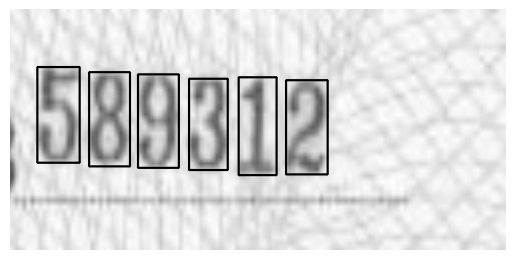

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Kết quả nhận dạng: [2 2 2 2 3 2]


In [15]:
#crop_img
def crop_define(path):
  img = cv2.imread(path)
  img1 = cv2.imread(path,0)

  resized_img = cv2.resize(img1, (3300, 3450))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  crop_img = resized_img[2680:3010, 720:1400]
  reco_digits(crop_img)

crop_define('/content/drive/My Drive/TTNT_BTL/bangtotnghiep1.jpg')

Original Image


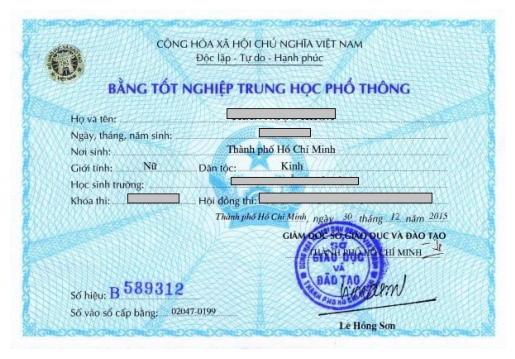



Grayscale Image


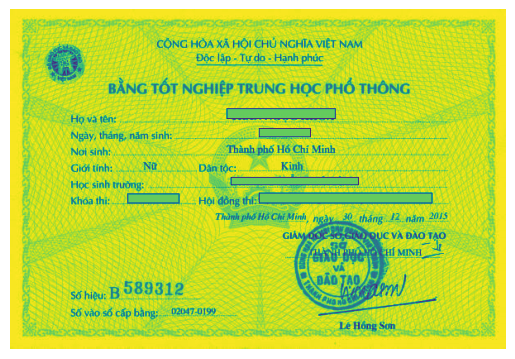



Resized Image


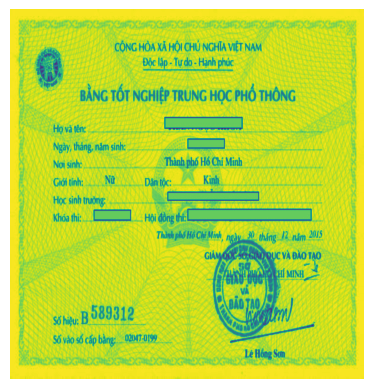



Cropped Image


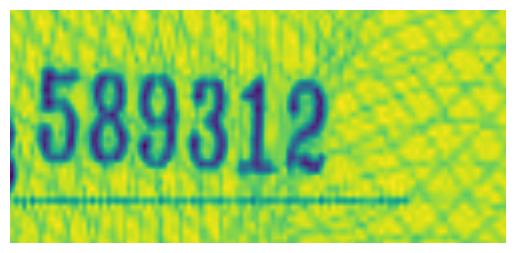



Gaussian Blur


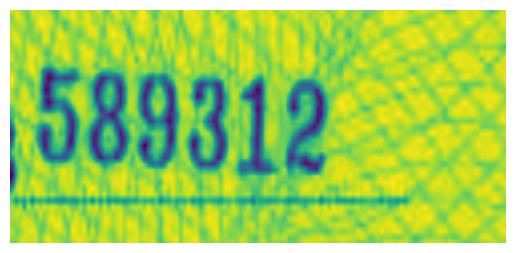



Otsu Threshold


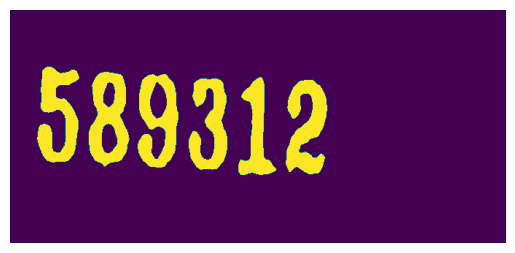

In [16]:

# Đọc ảnh gốc và ảnh xám
img = cv2.imread('/content/drive/My Drive/TTNT_BTL/bangtotnghiep1.jpg')
img1 = cv2.imread('/content/drive/My Drive/TTNT_BTL/bangtotnghiep1.jpg', 0)

resized_img = cv2.resize(img1, (3300, 3450))

# Hiển thị ảnh gốc
print('Original Image')
plt.imshow(img)
plt.axis('off')
plt.show()

# Hiển thị ảnh xám
print('\n\nGrayscale Image')
plt.imshow(img1)
plt.axis('off')
plt.show()

# Hiển thị ảnh đã resize
print('\n\nResized Image')
plt.imshow(resized_img)
plt.axis('off')
plt.show()

# Cắt ảnh theo vùng mong muốn
crop_img = resized_img[2680:3000, 720:1400]
print('\n\nCropped Image')
plt.imshow(crop_img)
plt.axis('off')
plt.show()

# Áp dụng Gaussian blur lên ảnh đã cắt
blur = cv2.GaussianBlur(crop_img, (5, 5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Xử lý điểm ảnh nhỏ
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    area = cv2.contourArea(c)
    if area < 800:
        cv2.drawContours(thresh, [c], -1, (0, 0, 0), -1)

# Hiển thị ảnh sau khi áp dụng Gaussian blur
print('\n\nGaussian Blur')
plt.imshow(blur)
plt.axis('off')
plt.show()

# Hiển thị ảnh sau khi áp dụng ngưỡng Otsu
print('\n\nOtsu Threshold')
plt.imshow(thresh)
plt.axis('off')
plt.show()



